### **MainQuest04**


#### 통계문제

### 문제 1)

- 빵집에서는 매일 아침에 구워지는 식빵 한 개의 평균 무게가 500g이 되도록 맞추고자 합니다. 빵집 주인은 오늘 아침에 구운 식빵 중에서 랜덤하게 25개의 식빵을 샘플링하여 무게를 측정했습니다. 그 결과, 표본 평균은 495g, 표준편차는 10g으로 나왔습니다. 빵집 주인이 목표한 500g의 무게를 충족하고 있는지(다시말해 목표 무게를 넘는지 안 넘는지)  5% 유의수준에서 검정해보세요

In [3]:
# 모집단의 분포가 알려지지 않음
# Z검정보다는 t검정을 한다.
# H0 = 500
# H1 != 500

import numpy as np
from scipy import stats # stats import?

#### 착안점
- stats.t.ppf 에서 t 통계량 확인 가능
- (from scipy.stats import ttest_1samp) # 실제 관측치로 1sample t-test 할 때!
- 이 문제는 양측검정임!

In [7]:
# 표본평균 495
# 표본표준편차 10

x_null = 500
x_bar = 495
s0 = 10
n = 25 # 샘플 수량
confidence_level = 0.95
alpha = 0.05

# t통계량 계산
t_statistic = (x_bar-x_null)/(s0/np.sqrt(n))
t_statistic
# t_statistic으로 p_value도 계산가능


np.float64(-2.5)

In [8]:
from scipy.stats import t # t 분포 import

In [10]:
p_value = 2 * (1 - t.cdf(abs(t_statistic),n-1)) # 양측검정이므로 # 자유도 df = n -1 = 24
p_value

np.float64(0.01965417511657863)

In [12]:
# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.")
else:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 빵의 평균 무게는 목표와 통계적으로 차이가 없습니다.")

t-값: -2.5000, p-value: 0.0197. 유의수준 0.05에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.


### 문제2) 분포 시각화

문제 1번을 바탕으로 분포를 그리고 t통계량을 빨간색 점선으로, 초록색 점선으로 임계값을 기각역을 초록색으로 칠해보세요.

***기각역**:  통계량이 들어왔을 경우 귀무가설을 기각할 수 있는 영역을 말합니다.

In [13]:
# 확인차 t-통계량 다시 출력!
t_statistic # t통계량

np.float64(-2.5)

In [23]:
# 양측검정...
# 기각역을 찾아야 함
t_critical_lower = -stats.t.ppf((1 + confidence_level) / 2, df=n-1)
t_critical_upper = stats.t.ppf((1 + confidence_level) / 2, df=n-1)
print(f"기각역하단: {t_critical_lower : .3f}")
print(f"기각역상단: {t_critical_upper : .3f}")

기각역하단: -2.064
기각역상단:  2.064


In [24]:
# 시각화 tool import!
import matplotlib.pyplot as plt
import seaborn as sns

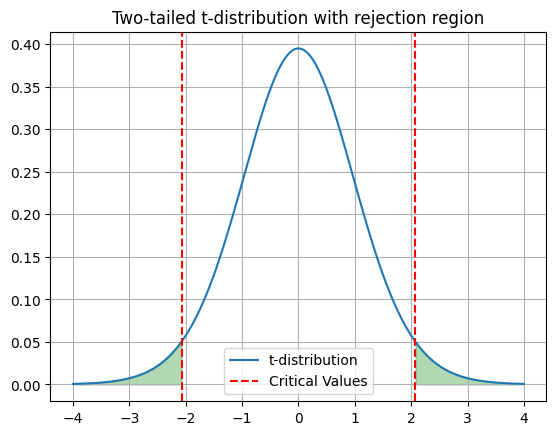

In [206]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# 표본평균 495, 표준편차 10, 샘플수량 25
n = 25
df = n-1
alpha = 0.05
x = np.linspace(-4, 4, 500)
y = t.pdf(x, df)

# 임계값
crit = t.ppf(1 - alpha/2, df)

plt.plot(x, y, label="t-distribution")
# 양쪽 임계값 선 그리기
plt.axvline(crit, color='red', linestyle='--', label="Critical Values")
plt.axvline(-crit, color='red', linestyle='--')

# 양측 기각역 색칠
plt.fill_between(x, y, where=(x >= crit), color='green', alpha=0.3)
plt.fill_between(x, y, where=(x <= -crit), color='green', alpha=0.3)

plt.legend()
plt.title("Two-tailed t-distribution with rejection region")
plt.grid(True)
plt.show()

### 문제 3) 단일 t 표본 검정

- 어느 학교에서 새로운 교육 프로그램을 도입한 후 학생들의 수학 성적이 향상되었는지 확인하려고 합니다. 프로그램 도입 후 무작위로 선택한 16명의 학생들의 수학 성적 평균은 78점이고, 모집단의 평균은 75점입니다. 모집단의 표준편차는 알 수 없다고 합니다.
- 유의수준 0.05에서 이 교육 프로그램이 성적 향상에 효과가 있는지 단일 표본 t-검정을 실시하세요.


In [46]:
# import pandas as pd

sample_scores = [79, 77, 80, 76, 78, 81, 75, 79, 77, 80, 78, 76, 82, 77, 79, 78]  # 예시 데이터 (평균 78.25)
mu0 = 75 # 모집단 평균 (mu1-mu0 > 0) 우측검정?

# 계산 과정
n = len(sample_scores) # 표본 숫자
df = n-1 # 자유도
sample_mean = np.mean(sample_scores)
sample_standard_deviation = np.std(sample_scores, ddof=1) # 표본 표준편차 이므로 분모 (n-1)꼴
alpha = 0.05 # 유의수준
standard_error = sample_standard_deviation/np.sqrt(n) # 표준오차 (표본표준편차 나누기 데이터갯수의 제곱근)

t_stat = (sample_mean - mu0)/standard_error # t 통계량
p_value = 1-t.cdf(t_stat,df) # 우측검정

print(f'표본숫자: {n}')
print(f'표본평균: {sample_mean}')
print(f'표본표준편차: {sample_standard_deviation:.3f}')
print(f'표준오차: {standard_error:.3f}')
print(f't통계량: {t_stat:.3f}')
print(f'p-value:{p_value:.4f}')

표본숫자: 16
표본평균: 78.25
표본표준편차: 1.915
표준오차: 0.479
t통계량: 6.789
p-value:0.0000


In [47]:
# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 교육프로그램은 효과가 없습니다")

t-값: 6.7890, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.


#### 다른 풀이
- 이 경우는 sample data가 주어진 경우
- scipy.stats에서 ttest_1samp 사용해보자

In [48]:
from scipy.stats import ttest_1samp

In [51]:
ttest_1samp(sample_scores, popmean = 75, alternative = "greater")
# statistic
# pvalue

TtestResult(statistic=np.float64(6.789028582272215), pvalue=np.float64(3.052686465933366e-06), df=np.int64(15))

In [56]:
# ttest_1samp(sample_scores, popmean = 75, alternative = "greater").statistic # attribute는 이렇게 꺼내는군!
ttest_result = ttest_1samp(sample_scores, popmean = 75, alternative = "greater")

In [57]:
t_stat, p_value = ttest_result.statistic, ttest_result.pvalue
# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 교육프로그램은 효과가 없습니다")

t-값: 6.7890, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.


### 문제 4) 독립 표본 t 검정

- 한 연구소에서 두 가지 새로운 다이어트 프로그램의 효과를 비교하려고 합니다. 연구소는 두 그룹의 참가자들을 대상으로 12주간 다이어트 프로그램을 진행한 후 체중 감소량을 측정했습니다.
- 유의수준 5% 에서 두 그룹 간 평균 체중 감소량에 유의미한 차이가 있는지 독립 표본 t-검정을 실시하세요.

In [60]:
# 독립 표본 t검정(등분산성? 가정?)
# 그룹 A와 B의 체중 감소량 데이터
# A가 대조군 B가 비교군.. A가 null B가 alternative
group_A = [5.1, 4.7, 6.2, 4.9, 5.3, 6.1, 5.0, 5.8, 4.8, 5.2] # 10명
group_B = [4.3, 4.1, 3.8, 4.6, 4.0, 4.5, 3.7, 4.2, 3.9, 4.4, 3.5, 4.3] # 12명


In [58]:
from scipy.stats import levene # 등분산 검정

In [61]:
np.mean(group_A), np.mean(group_B)

(np.float64(5.3100000000000005), np.float64(4.1083333333333325))

In [63]:
len(group_A), len(group_B) # A는 10명, B는 12명

(10, 12)

In [65]:
# 등분산성 검정부터!
# 등분산이 아니면 pooled variance가 아니고, 자유도 공식도 다름!
levene_test = levene(group_A,group_B)
levene_stat = levene_test.statistic
levene_pvalue = levene_test.pvalue
alpha = 0.05

if levene_pvalue < alpha :
  print(f"levene test: {levene_stat :.4f}, p-value: {levene_pvalue : .4f} 유의수준 {alpha}에서 귀무가설 기각합니다. 등분산 미충족")
else:
  print(f"levene test: {levene_stat :.4f}, p-value: {levene_pvalue : .4f} 유의수준 {alpha}에서 귀무가설 기각에 실패합니다. 등분산 충족")

levene test: 1.2856, p-value:  0.2703 유의수준 0.05에서 귀무가설 기각에 실패합니다. 등분산 충족


In [68]:
# 독립 2표본 t검정
# 등분산성 충족

from scipy.stats import ttest_ind # ttest_ind 사용

two_ttest_result = ttest_ind(group_A, group_B, equal_var = True) # equal_var = True인지 확인하려고 위 levene test한 것! # statistic, pvalue

alpha = 0.05 # 확인차 넣음
t_stat = two_ttest_result.statistic
p_value = two_ttest_result.pvalue

# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 다이어트 프로그램은 효과가 없습니다")

t-값: 6.3898, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.


### 문제 5) 대응표본 t검정

<aside>

대응표본 t-검정은 두 집단간 평균 차이를 비교할 때 사용되는 점은 독립 t검정 동일하나, 같은 집단에서 두 번 수집할 때 사용되는 검정입니다.( ex 고혈압 투여 전후 환자 단일 그룹의 혈압의 차) `scipy.stats` docs에서 적절한 함수를 찾아보고 적용해보세요.

</aside>

In [82]:
from scipy.stats import ttest_rel

# 운동 전후 체중 데이터
before = np.array([70, 80, 65, 90, 75, 85, 78, 82, 68, 73]) # 10명
after = np.array([68, 78, 64, 88, 74, 83, 77, 80, 67, 72]) # 10명.. 각각 1:1 대응
alpha = 0.05 # 유의수준

paired_t_test = stats.ttest_rel(before,after,alternative = "greater") # 운동(전) before가 체중이 더 많을 테니 "greater로"
t_stat = paired_t_test.statistic
p_value = paired_t_test.pvalue

In [83]:
# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 고혈압약은 효과가 없습니다.")

t-값: 9.0000, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.


### 문제 6) 표본 추출

- Quest 05-01의  Online Retail II 데이터에서 표본을 추출하여 모집단의 평균을 추정해보세요.
- 영국(United Kingdom)에서 주문된 데이터 에서 30개, 100개, 300개의 샘플을 무작위 추출하여 평균 구매 금액(Total Price)를 계산해보세요. 표본의 크기가 커질 수록 모집단의 평균과 가까워지는지 확인해보세요.
- 데이터 불러오는 코드 & 예상결과

In [84]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
print("Path to dataset files:", path)
retail = pd.read_csv(path + '/' + os.listdir(path)[0])
retail.head(3)

100%|██████████| 14.5M/14.5M [00:00<00:00, 170MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mashlyn/online-retail-ii-uci/versions/3


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [139]:
# Total Price는 Quantity 곱하기 Price
# 이 부분을 놓쳐서 다시 시작함!
retail['TotalPrice'] = retail['Quantity'] * retail['Price']

In [140]:
# 국가별, Invoice 관측치 확인
# 영국 981,330건
# 독일 17,624건
retail.groupby('Country')['Invoice'].apply(len).sort_values(ascending=False)[:5]

,Invoice
Country,
United Kingdom,981330
EIRE,17866
Germany,17624
France,14330
Netherlands,5140


In [141]:
# 결측치 확인(영국 데이터)
retail_UK = retail[retail['Country']=='United Kingdom'].reset_index(drop=True) # 샘플링 목적, idx 0부터 시작하도록
# retail_UK.info()

# 독일 데이터(나중에 비교대상)
retail_GR = retail[retail['Country']=='Germany'].reset_index(drop=True) # 샘플링 목적, idx 0부터 시작하도록

print(f"영국 관측치 수 : {len(retail_UK)}")
print(f"독일 관측치 수 : {len(retail_GR)}")

영국 관측치 수 : 981330
독일 관측치 수 : 17624


#### 현재 문제는 sampling에 대한 것!
- Customer ID가 비어있는 결측치를 제거하는 것이 전처리 관점에서 맞으나,    
문제에 명시된 조건이 아니므로 결측치 제거 하지 않고 샘플링 수행하겠음!
- TotalPrice = Quantity * Price 곱인 것은 인지했으나.. Quantity, Price 분포가 각각 존재한다면   
그것의 곱의 분포에 대해 모평균과 표본평균을 비교하는게 유효한지  의문이 생김

In [144]:
# round(retail_UK['Price'].mean(),3) 영국 전체 평균 4.538
# 샘플 사이즈 30, 100, 300

checkdt_1 = retail_UK[retail_UK['Customer ID'].isnull()][['Country','TotalPrice']]
checkdt_2 = retail_UK[retail_UK['Customer ID'].notnull()][['Country','TotalPrice']]

# checkdt_1['Price'].mean()
mean0 = retail_UK['TotalPrice'].mean()
mean1 = checkdt_1['TotalPrice'].mean()
mean2 = checkdt_2['TotalPrice'].mean()

print(f'전체 영국 TotalPrice의 평균:{mean0: .4f}')
print(f'고객ID없는 영국 TotalPrice의 평균: {mean1:.4f}')
print(f'고객ID있는 영국 TotalPrice의 평균: {mean2:.4f}')


전체 영국 TotalPrice의 평균: 16.6943
고객ID없는 영국 TotalPrice의 평균: 10.7327
고객ID있는 영국 TotalPrice의 평균: 18.6246


In [146]:
retail_UK['TotalPrice'].sample(30, random_state=42).head() # 되는지 중간 체크!

,TotalPrice
846418,11.70
104240,3.36
332026,3.36
633424,15.30
462973,0.85


In [147]:
retail_UK['TotalPrice'].sample(30, random_state=42).mean() # 이것도 체크!

np.float64(11.881333333333334)

In [148]:
# 그냥 결측치 제거 안하고 진행!
# 그 전에 'Country', 'Price'만 필요하니 데이터 가공하자!
# 전체 평균이 16.6943 임을 감안!

sample_sizes = [30, 100, 300] # 표본의 크기..
result = {"Size" : [],
          "Sample_Mean": []
          } # size랑, sample mean을 넣어보자!

for s in sample_sizes:
  sample_dt = retail_UK.sample(s, random_state = 12) # seed고정 (12로!)
  x_bar = sample_dt['TotalPrice'].mean()
  result["Size"].append(s)
  result["Sample_Mean"].append(x_bar)
  print(f'sample_size:{s}, "샘플평균": {x_bar}')


sample_size:30, "샘플평균": 11.094666666666663
sample_size:100, "샘플평균": 16.125999999999998
sample_size:300, "샘플평균": 20.987833333333334


#### 설명추가
- 원래 샘플 size가 커질수록 표본평균의 '평균'이 모평균에 가까워진다는 것이 Weak Law of Large Number(약한 대수의 법칙) 임
- 현재 샘플 수 30, 100, 300만으로는 모평균 값 16.69에 가까이 가는 것 같아도 정확히 파악이 어려움
- 표본 '크기'가 커졌지만, 단발성으로 추출시 편향되게 추출될 수도 있기에 일정한
반복수를 설정해야 한다고 생각함

#### 반복수 설정 및 분포 확인
- 반복수를 k=100,200,1000 등 임의의 값을 정해두고 동등한 과정을 거치면 될 것 같음
- k=1000으로 하니 너무 오래걸려 k=200으로 조정

n=30 평균들의 평균: 16.75, std: 9.68
n=100 평균들의 평균: 20.78, std: 55.14
n=300 평균들의 평균: 15.49, std: 18.50


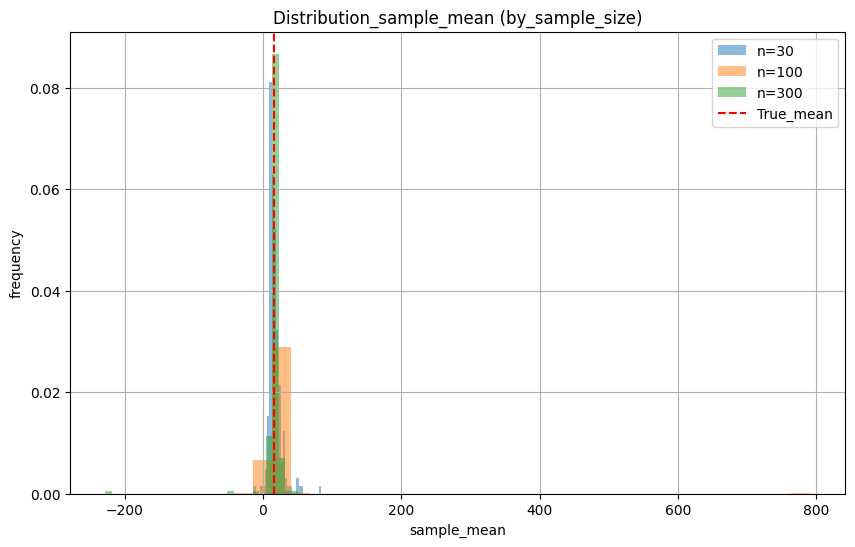

반복수 : 200, 구동시간 : 22.73334002494812초


In [156]:
import numpy as np
import matplotlib.pyplot as plt
import time

start = time.time()

sample_sizes = [30, 100, 300]
k = 200 # 반복수 200으로 설정
overall_mean = retail_UK['TotalPrice'].mean()

plt.figure(figsize=(10, 6))

for s in sample_sizes:
  means = []
  for _ in range(k):
    sample_dt = retail_UK.sample(s, random_state=None)['TotalPrice']
    means.append(sample_dt.mean())

  plt.hist(means, bins=30, alpha=0.5, label=f'n={s}', density = True)
  print(f"n={s} 평균들의 평균: {np.mean(means):.2f}, std: {np.std(means):.2f}")

plt.axvline(overall_mean, color='red', linestyle='--', label='True_mean')
plt.legend()
plt.title('Distribution_sample_mean (by_sample_size)')
plt.xlabel('sample_mean')
plt.ylabel('frequency')
plt.grid(True)
plt.show()

end = time.time()

print(f'반복수 : {k}, 구동시간 : {end-start}초')

#### 결론
- 샘플 크기가 30에 가까워 질 수록 표본평균의 평균이 모평균에 가까워짐을
  확인할 수 있음
- 이건 중심극한정리(Central Limit Theorem)보다는 약한 대수의 법칙(Weak Law of Large Number)라고 보는게 더 맞을 듯
- 중심 극한 정리가 성립하려면 샘플간에 독립된 경향이 보여야 하는데, 주문량이 많은 고객이, 구매 단가가 높은 물품을 더 구매하거나 하는 경향성등으로 독립성 가정(iid, identitally, independently distributued 가정이 만족 안 될 수 있음)
- WLLN이 성립하기 위한 전제 조건은, 2차 모멘트(분산)가 유한하다는 조건인데, 현재 데이터는 구매 취소 등으로 값이 음수 등으로 극단치가 나타나는 관계로, WLLN도 경향성을 관찰할 수 있으나, 실험적으로 만든 데이터 대비 WLLN이 성립하는걸 명확하게 보기는 어려움


n=5 평균들의 평균: 22.21, std: 73.26
n=10 평균들의 평균: 15.43, std: 53.58
n=15 평균들의 평균: 14.65, std: 86.17
n=30 평균들의 평균: 17.65, std: 25.45
n=100 평균들의 평균: 17.78, std: 10.76
n=300 평균들의 평균: 16.65, std: 5.95


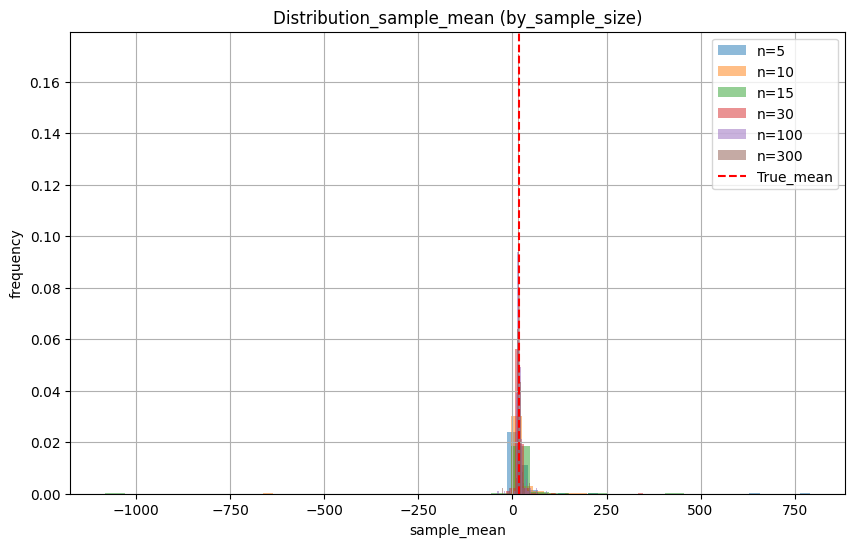

반복수 : 200, 구동시간 : 43.36731839179993초


In [157]:
import numpy as np
import matplotlib.pyplot as plt
import time

start = time.time()

sample_sizes = [5, 10, 15, 30, 100, 300] # 전체 평균 16.69!
k = 200 # 반복수 200으로 설정
overall_mean = retail_UK['TotalPrice'].mean()

plt.figure(figsize=(10, 6))

for s in sample_sizes:
  means = []
  for _ in range(k):
    sample_dt = retail_UK.sample(s, random_state=None)['TotalPrice']
    means.append(sample_dt.mean())

  plt.hist(means, bins=30, alpha=0.5, label=f'n={s}', density = True)
  print(f"n={s} 평균들의 평균: {np.mean(means):.2f}, std: {np.std(means):.2f}")

plt.axvline(overall_mean, color='red', linestyle='--', label='True_mean')
plt.legend()
plt.title('Distribution_sample_mean (by_sample_size)')
plt.xlabel('sample_mean')
plt.ylabel('frequency')
plt.grid(True)
plt.show()

end = time.time()

print(f'반복수 : {k}, 구동시간 : {end-start}초')

### 문제 7) 신뢰구간

- 영국 데이터에서 TotalPrice를 사용하여 95% 신뢰 구간을 계산하세요. 또한 표본의 크기가 30,100, 300으로 변하면서 신뢰구간이 변하는 형태를 확인해 보세요.
- Hint) `stats` 모듈에서 신뢰구간을 바로 구하는 함수를 확인해보세요.

In [159]:
#retail_UK.shape
import scipy.stats as stats

In [160]:
# 신뢰 구간 계산 함수
def confidence_interval(data, confidence=0.95):
    mean = data.mean()
    std_err = stats.sem(data)
    interval = stats.t.interval(confidence, len(data)-1, loc=mean, scale=std_err)
    return mean, interval

In [162]:
mean, interval = confidence_interval(retail_UK['TotalPrice'])
print(f"평균: {mean:.2f}, 95% 신뢰구간: ({interval[0]:.2f}, {interval[1]:.2f})")

평균: 16.69, 95% 신뢰구간: (16.09, 17.29)


#### 의문사항
- 영국 데이터 전체를 사용해서 신뢰 구간을 계산한건데, 이 경우 영국 전체 데이터는 모집단이 아니라,    
이 데이터셋 전체가 샘플이라는 전제가 필요할 것 같음
- 역시 지금 문제도 샘플 숫자에 따라 신뢰구간이 영국 전체 데이터의 신뢰구간에 수렴함을 보이려면   
역시 반복수 k를 설정해서 진행해야 할 것으로 추정됨

In [163]:
sample_sizes = [30, 100, 300]

for size in sample_sizes:
    sample = retail_UK['TotalPrice'].sample(size, random_state=42)
    mean, interval = confidence_interval(sample)
    print(f"Sample size: {size}, Mean: {mean:.2f}, 95% CI: {interval}")

Sample size: 30, Mean: 11.88, 95% CI: (np.float64(6.37841466090658), np.float64(17.38425200576009))
Sample size: 100, Mean: 16.09, 95% CI: (np.float64(11.142955150004974), np.float64(21.02784484999502))
Sample size: 300, Mean: 13.34, 95% CI: (np.float64(11.264027626023802), np.float64(15.424439040642865))


### 문제 8 가설검정 t-test

- 영국과 독일의 고객의 평균 구매금액(Total Price)가 동일한지 검정해보세요. 귀무가설과 대립가설을 세우고 통계검정을 통해 결과를 해석하세요
- 영국과 독일의 분포는 등분산성은 따른다고 가정

In [165]:
# 귀무가설 : 영국(TotalPrice)평균 = 독일(TotalPrice)평균
# 대립가설 : 영국(TotalPrice)평균, 독일(TotalPrice)평균은 다르다
# 독립2표본 t검정
# 등분산성 가정

from scipy.stats import ttest_ind


In [167]:
# country : 'United Kingdom','Germany'
# ttest_ind에 넣으려면 'array'형태여야 함
# 양측검정!

retail_UK.shape, retail_GR.shape # 앞에서 만들어 둔 데이터들

((981330, 9), (17624, 9))

In [180]:
dd = retail_UK['TotalPrice'].head()

In [181]:
dd.to_numpy() # array로 변형된 것 확인

array([ 83.4,  81. ,  81. , 100.8,  30. ])

In [186]:
UK_totalprice = retail_UK['TotalPrice'].to_numpy()
GR_totalprice = retail_GR['TotalPrice'].to_numpy()

In [189]:
ttest_result = ttest_ind(UK_totalprice,GR_totalprice,alternative="two-sided") # alternative, "two-sided", "less", "greater"

t_stat, p_value = ttest_result.statistic, ttest_result.pvalue

# 가설 검정 결과 해석
if p_value < 0.05:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.")
else:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 없습니다.")

영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.


### A/B 테스트

문제 9~ 10) A/B test스타트업A에서 새로운 여행 패키지 상품 판매를 진행하고자 합니다. 패키지 판매 기획자는 새로운 패키지의 상품 판매 효율을 높이고 싶어하며, 이를 위해 기존에 상품이 판매되던 웹 페이지 (페이지 A) 가 아닌 새로운 웹 페이지 (페이지 B)를 통해 판매하고자 합니다. 패키지 판매 기획자는 신규 웹페이지 (페이지 B) 가 기존 (페이지 A) 대비 효과가 좋은 지 확인하기 위해 A/B 테스트를 진행하였습니다.

- 페이지 A: 기존에 운영하던 패키지 판매 웹 페이지
- 페이지 B: 새롭게 생성한 패키지 판매 웹 페이지

두 페이지는 스타트업A 패키지 판매 사이트에 접속하는 유저에게 랜덤으로 노출되었고, 테스트 결과는 다음과 같습니다.

| 페이지   | 노출 수 | 구매 수 |
|----------|---------|---------|
| 페이지 A | 1000    | 80      |
| 페이지 B | 200     | 22      |

## **문제9)**

- 결과를 바탕으로 패키지 기획자는 페이지 B의 효과에 대해 어떤 결정을 해야 할지 서술해 주세요.
- Hint) https://abtestguide.com/calc/  를 사용하여 해석해보세요
- 풀이과정
  - 강의교안 statsmodel.stats.proportion 에서 proportions_ztest를 import한다!
  - 상기 hint 사이트에 값을 넣어서 해석해본다

In [198]:
# 페이지A n1= 1000, x1 = 80, p1 = 0.08
# 페이지B n2= 200, x2 = 22, p2 = 0.11
# 페이지B가 페이지A 대비 더 좋은지 A/B test를 하는 것이니, 단측 검정!

# 교안의 A/B test 코드 활용

from statsmodels.stats.proportion import proportions_ztest

purchase = [80, 22] # 페이지A, 페이지B 순서
exposure = [1000, 200] # 페이지A, 페이지B 순서
alpha = 0.05

z_stat, p_value = proportions_ztest(purchase, exposure, alternative='smaller')

if p_value < alpha:
  print(f'A/B테스트 z통계량 : {z_stat}, A/B테스트 p_value : {p_value : .3f}, 페이지전환 효과 통계적 유의함!')
else:
  print(f'A/B테스트 z통계량 : {z_stat}, A/B테스트 p_value : {p_value : .3f}, 페이지전환 효과 통계적으로 유의하지 않음')

A/B테스트 z통계량 : -1.3887549490757716, A/B테스트 p_value :  0.082, 페이지전환 효과 통계적으로 유의하지 않음


In [ ]:
# 이미지 colab-markdown 올리는 것 등은
# chatGPT도움을 받음
# github 레포에 업로드하고... google-colab에 올리는 방식 사용!

#### Hint에서의 Tool사용해보기
- https://abtestguide.com/calc/ 활용결과
- Github에 Tool 사용결과 이미지 레포에 저장 후, 마크다운에 반영
  - "github.com"이 아니라 "raw.githubusercontent.com" 사용
  - 그리고 중간에 blob 지워야 함!

<img src= "https://raw.githubusercontent.com/yj-start-2025/DS4_by_modulabs/main/Module_04_Statistics/01_ABtest_01.png" width="300">

- 결과해석1
  - Test 결과는 유의하지 않음
  - Conversion-rate의 차이는 37.5%지만, 통계적으로 유의하지 않음
  - SRM Alert는 A, B 두 집단 간의 sample 크기 차이가 클 때 뜨는 warning!

<img src = "https://raw.githubusercontent.com/yj-start-2025/DS4_by_modulabs/main/Module_04_Statistics/02_ABtest_02.png" width="500">


- 결과해석2(통계량)
  - Relative-uplift : A/B 방식 간의 비율 차이
$\frac{P_A - P_B}{P_A}$ = 37.5% 나옴!
  - P-value가 0.1031, 통계적으로 유의하지 않음!
  - Power가 76.37% 결국 검정력도 강하지 않다는 의미!

<img src="https://raw.githubusercontent.com/yj-start-2025/DS4_by_modulabs/main/Module_04_Statistics/03_ABtest_03.png" width = "600">

#### 결론
- statsmodel.stats.proportion 에서 proportions_ztest를 import 하는 경우,   
web상의 A/B test 계산기 사용의 경우 모두 통계적으로 유의하지 않다는 결론이 도출됨

## **문제 10)**

- A/B 테스트의 결과가 통계적으로 유의하나 효과의 차이 자체는 매우 작은 경우, 어떤 의사결정을 할 수 있을지 사례를 통해 설명해 주세요.
- Hint) A/B 관련 자료를 찾아보세요(추천 문헌 [요즘IT](https://yozm.wishket.com/))

#### 요즘IT 사이트 검색 결과
- https://yozm.wishket.com/ 관련된 내용을 검색해 봄
  - 검색어는 'AB test 효과'로 검색
- 효과의 차이가 작은데(converstion rate의 비율 차), 통계적으로 유의한 이유
  - 통계적 가설 검정은 결국 통계적 분포 가정을 하는데, t나 Z나 분포 가정을 할 경우에 표본의 크기가 커지게 되면 표준오차의 크기가  
  작아지면서 검정통계량이 커지게 되어 귀무가설을 더 기각하기 쉬워짐   
  - 다시 말해, 두 집단간의 비율 차가 크지 않음에도 p-value는 매우 작은 값일 수 있다는 의미


#### 가능한 대안은?
- https://yozm.wishket.com/magazine/detail/1034/에 들어가 보면 '매거진 입맛' 저자는   
베이즈 확률에 기반한 방법론을 소개하고 있음
- P-value만 따지지 않고, Cohen’s h, relative uplift, 또는 MDE(min detectable effect)를 기준으로
실제 차이가 의미가 있는지 고려하는 방법도 있음


## MainQuest04 회고

## **회고 남기기**
01 Keep(잘된 점)
-  다른 그루 분들보다는 꽤 느렸지만, 오늘은 제 시간안에 MainQuest 문제를 거의 해결할 수 있었다.
- 데이터를 다루고, 함수를 정의하거나, for문 등으로 간단한 시뮬레이션 하는 것에 익숙해짐
- 문제에서 주어진 상황, 가정에 대해 깊이 있는 생각을 하면서, 다른 대안도 모색하는 시간도 가질 수 있었음.(반복수를 반영하여, 표본평균의 평균이 모평균에 수렴하는 Weak Law of Large Numbers를 간단한 시뮬레이션으로 확인해 본 점)
- Colab 환경, 마크다운 문법, github 등에 대한 숙련도가 향상된 점

02 Problem(개선 점)
- 통계학적인 가정이나, 주어진 함수나 모듈에 대해 따져보는 것은 항상 quest나 일과 이후에 하는게 합리적인 것 같음(우선순위 선정의 문제)
- matplotlib.pyplot, seaborn.sns 같은 시각화 tool에 대한 연습이 아직 부족함

03 Try(앞으로 노력할 점)
- 시간적으로 촉박하더라도 학습한 내용은 주기적으로 velog, github을 통해 정리하기
- python 문법 복습, 기초적인 코딩테스트 문제 풀이를 통해 python자체에 대한 숙련도 향상이 더 필요
- 자주 쓰이는 모듈, 라이브러리에 대해 정리해서 문서화 할 필요 있을 듯
  - 향후 빅데이터분석기사, ADP 응시 목적
- Markdown, Tex과 같이 문서화에 관련된 도구에도 숙련도 향상이 지속될 필요 있음

04 기타
- statsmodel.stats.proportion 에서 proportions_ztest 사용한 p-value(0.08)와, web상의 p-value(0.103)가 다른데 이 부분에 대해 좀 더 고민해 봐야겠다.
  - 이항분포 정규근사 과정 때문에 오차가 생기는데, 이걸 continuity correction으로 보정해야 하는데 해당 모듈에는 그런 기능은 없음
  - 직저 함수 정의하거나 수동으로 계산하는 방식을 고려해야 할 듯

